In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

# Set up StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=20)

# Load data
excel = pd.read_excel('../Dataset_Process/Dataset/original_data.xlsx', header=2)
data_orginal = pd.DataFrame(excel)

# Filter and preprocess
data = data_orginal[['cC', 'cO', 'cN', 'cF', 'cP', 'cS', 'OCr', 'FCr', 'FOr', 'PCr', 'NCr',
                     'SCr', 'NFr', 'POr', 'NOr', 'SOr', 'PFr', 'SFr', 'SPr', 'NSr', 'FNS/Or',
                     'FP/Or', 'FNS/FPr', 'dendrtic', 'sphere',
                     'Li longitudinal growth size', 'Li longitudinal growth maximum size',
                     'The difference between the maximum longitudinal growth size and average size',
                     'General thickness of deposition', 'Maximum deposition thickness',
                     'Li horizontal growth size', 'Li horizontal growth maximum size',
                     'The difference between the maximum horizontal growth size and average size',
                     'Average deposition density', 'Œª value']]

df = data[data['dendrtic'].notnull()]
df = df[(df['dendrtic'] != 0) & (df['sphere'] == 0) | (df['dendrtic'] == 0) & (df['sphere'] != 0)]
df = df[df['Li longitudinal growth size'].notnull()]
df = df.fillna(0)
display(df)

# Features and labels
X = df[['Li longitudinal growth size', 'Li longitudinal growth maximum size',
        'The difference between the maximum longitudinal growth size and average size',
        'General thickness of deposition', 'Maximum deposition thickness',
        'The difference between the maximum horizontal growth size and average size',
        'Li horizontal growth size', 'Li horizontal growth maximum size',
        'Average deposition density', 'Œª value']]
y = df['sphere']

# Loop for feature selection
for i in range(5):
    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)
    
    # Initialize Random Forest Classifier as the base model
    clf = RandomForestClassifier()
    
    # Perform feature selection using RFECV
    selector = RFECV(estimator=clf, step=1, cv=cv, min_features_to_select=2)
    selector = selector.fit(X_train, y_train)
    
    # Output feature selection results
    selected_features = X.columns[selector.support_]
    print(f"Run {i+1}:")
    print("Selected features:", selected_features.tolist())
    print("Feature rankings (lower is better):", selector.ranking_)
    print("RFECV best score (test set accuracy):", selector.score(X_test, y_test))
    
    # Output feature importance
    feature_importance = selector.estimator_.feature_importances_
    print("Feature importances:")
    for feature, importance in zip(selected_features, feature_importance):
        print(f"Feature '{feature}' importance score: {importance}")
    print("-" * 50)


KeyError: "['Li horizontal growth size', 'Li horizontal growth maximum size'] not in index"

Mean CV Score (Negative MAE): -6.5111
CV Score Standard Deviation: 1.8393
Feature Importances:
cC: 0.0736
cO: 0.1157
cS: 0.0086
OCr: 0.0838
FCr: 0.0336
FOr: 0.0659
PCr: 0.0574
NCr: 0.0110
SCr: 0.0071
NFr: 0.0136
POr: 0.0957
NOr: 0.2371
SOr: 0.0863
PFr: 0.0202
SFr: 0.0076
SPr: 0.0000
NSr: 0.0830


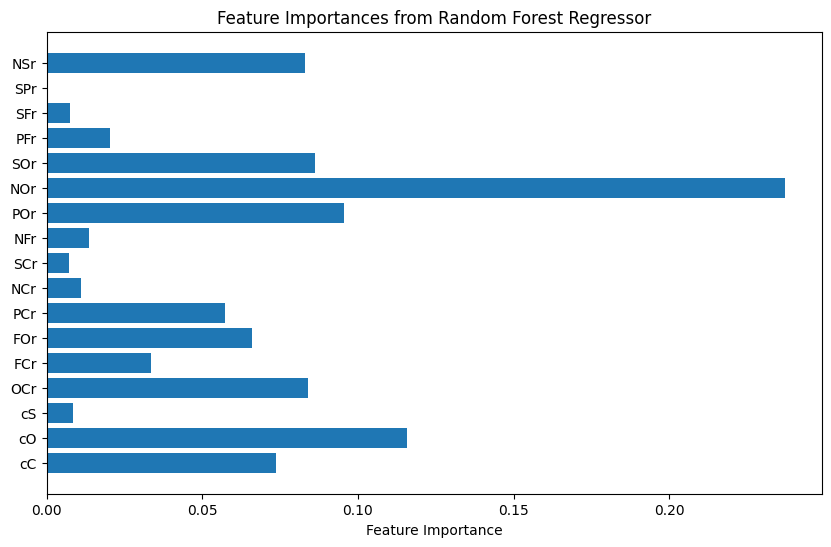

In [26]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor

# ËØªÂèñÊï∞ÊçÆ
data = pd.read_excel('../Dataset_Process/Dataset/lambda_data.xlsx', sheet_name='all', header=0)
data = data.fillna(data.mean())  # ‰ΩøÁî®ÂùáÂÄºÂ°´ÂÖÖÁº∫Â§±ÂÄº
data = data.drop(columns = ['cF','cN','cP','FNS/FPr','FNS/Or','FP/Or'])
X = data[data.columns[:-2]]  # ÁâπÂæÅÁü©Èòµ
y = data['lambda']  # ÁõÆÊ†áÂèòÈáè

# ÂàùÂßãÂåñÈöèÊú∫Ê£ÆÊûóÂõûÂΩíÂô®
model = RandomForestRegressor()

# ‰ΩøÁî® KFold ËøõË°å 5 Êäò‰∫§ÂèâÈ™åËØÅ
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# ‰ΩøÁî® cross_val_score ËÆ°ÁÆóÊØè‰∏™ÊäòÂè†ÁöÑ MAE (Ë¥üÂÄº)
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_error')

# ËÆ°ÁÆó‰∫§ÂèâÈ™åËØÅÁªìÊûúÁöÑÂùáÂÄºÂíåÊ†áÂáÜÂ∑Æ
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

# ËæìÂá∫‰∫§ÂèâÈ™åËØÅÁöÑÁªìÊûú
print(f"Mean CV Score (Negative MAE): {mean_cv_score:.4f}")
print(f"CV Score Standard Deviation: {std_cv_score:.4f}")

# Âú®Êï¥‰∏™Êï∞ÊçÆÈõÜ‰∏äËÆ≠ÁªÉÊ®°ÂûãÔºå‰ª•Ëé∑ÂèñÁâπÂæÅÈáçË¶ÅÊÄß
model.fit(X, y)

# Ëé∑ÂèñÁâπÂæÅÈáçË¶ÅÊÄß
feature_importances = model.feature_importances_

# ÊâìÂç∞ÁâπÂæÅÈáçË¶ÅÊÄß
print("Feature Importances:")
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance:.4f}")

# ÂèØËßÜÂåñÁâπÂæÅÈáçË¶ÅÊÄß
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importances from Random Forest Regressor')
plt.show()


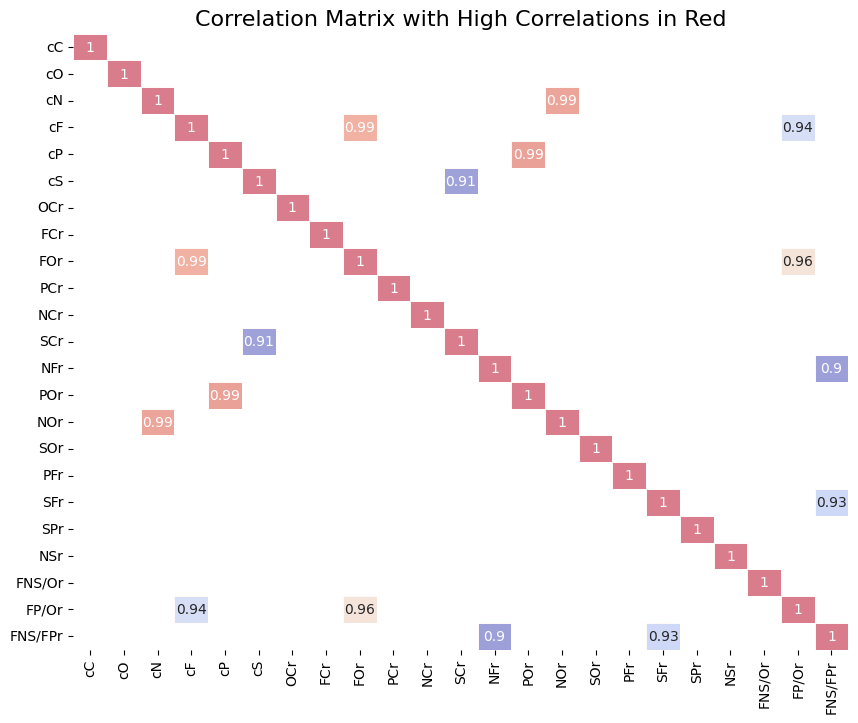

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ËÆ°ÁÆóÁâπÂæÅÈó¥ÁöÑÁõ∏ÂÖ≥ÊÄßÁü©Èòµ
correlation_matrix = X.corr()

# ÂàõÂª∫‰∏Ä‰∏™‰∏éÁõ∏ÂÖ≥ÊÄßÁü©ÈòµÁõ∏ÂêåÂ§ßÂ∞èÁöÑÂ∏ÉÂ∞îÁü©ÈòµÔºåÁî®‰∫éÊ†áËÆ∞Áõ∏ÂÖ≥ÊÄßÂ§ß‰∫é0.9ÁöÑÂå∫Âüü
mask = correlation_matrix > 0.9

# ‰ΩøÁî® seaborn ÁªòÂà∂ÁÉ≠ÂäõÂõæ
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", mask=~mask, cbar=False, linewidths=0.5)

# ÂèØÈÄâÔºöÂú®È´òÁõ∏ÂÖ≥ÊÄßÂå∫ÂüüÊ∑ªÂä†Á∫¢Ëâ≤Âå∫ÂüüËÉåÊôØ
sns.heatmap(mask, annot=False, cmap="Reds", cbar=False, mask=~mask, alpha=0.5)

# ËÆæÁΩÆÊ†áÈ¢ò
plt.title('Correlation Matrix with High Correlations in Red', fontsize=16)

# ÊòæÁ§∫ÂõæÂΩ¢
plt.show()


In [8]:
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor

# ËØªÂèñÊï∞ÊçÆ
data = pd.read_excel('../Dataset_Process/Dataset/lambda_data.xlsx', sheet_name='all', header=0)
data = data.fillna(data.mean())  # ‰ΩøÁî®ÂùáÂÄºÂ°´ÂÖÖÁº∫Â§±ÂÄº
# data = data.drop(columns = ['cF','cN','cP','FNS/FPr','FNS/Or','FP/Or'])
X = data[data.columns[:-2]]  # ÁâπÂæÅÁü©Èòµ
y = data['lambda']  # ÁõÆÊ†áÂèòÈáè
pca = PCA(n_components=5)  # ÈôçÁª¥Âà∞ 5 ‰∏™ÁâπÂæÅ
X_pca = pca.fit_transform(X)

print("PCA Ëß£ÈáäÊñπÂ∑ÆÊØî‰æã:", pca.explained_variance_ratio_)


PCA Ëß£ÈáäÊñπÂ∑ÆÊØî‰æã: [0.83236028 0.1170833  0.02445406 0.0107843  0.00588652]


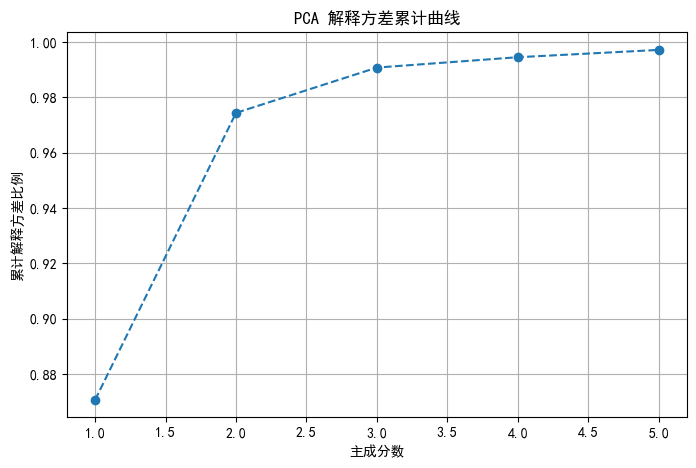

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# ËÆ°ÁÆóÁ¥ØËÆ°ÊñπÂ∑ÆË¥°ÁåÆÁéá
explained_variance = np.cumsum([0.8705984, 0.10377763, 0.01638391, 0.00374602, 0.00263953])
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # ‰ΩøÁî®Èªë‰Ωì
plt.rcParams['axes.unicode_minus'] = False  # Ëß£ÂÜ≥Ë¥üÂè∑Êó†Ê≥ïÊòæÁ§∫ÁöÑÈóÆÈ¢ò
# ÁîªÊäòÁ∫øÂõæ
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('‰∏ªÊàêÂàÜÊï∞')
plt.ylabel('Á¥ØËÆ°Ëß£ÈáäÊñπÂ∑ÆÊØî‰æã')
plt.title('PCA Ëß£ÈáäÊñπÂ∑ÆÁ¥ØËÆ°Êõ≤Á∫ø')
plt.grid(True)
plt.show()


In [10]:
feature_importance = pd.DataFrame(pca.components_.T, index=X.columns)
print(feature_importance)


                0         1         2         3         4
cC      -0.142292  0.159815 -0.327775  0.102014 -0.613540
cO       0.354687 -0.784729 -0.263953 -0.171497  0.131726
cN       0.001600  0.013117  0.302418 -0.107869  0.152004
cF      -0.157821  0.418507 -0.460299 -0.514341  0.410291
cP      -0.044240  0.099238  0.101836  0.636182  0.257579
cS      -0.003581  0.061849  0.570857 -0.171418  0.220070
OCr      0.908758  0.409300 -0.036246  0.040336 -0.045001
FCr     -0.008088  0.023366 -0.023821 -0.106509  0.274350
FOr     -0.002478  0.007343 -0.007056 -0.006918  0.002581
PCr     -0.004415  0.012025  0.026571  0.095696  0.074838
NCr      0.006409  0.005752  0.078699 -0.044068  0.009280
SCr      0.006825  0.022252  0.144716 -0.054071  0.025464
NFr      0.012425 -0.002151  0.110922 -0.117760 -0.136721
POr     -0.000655  0.001677  0.001411  0.008713  0.003530
NOr     -0.000023  0.000253  0.003903 -0.000943  0.002278
SOr      0.000044  0.000237  0.001820 -0.000514  0.000445
PFr     -0.004

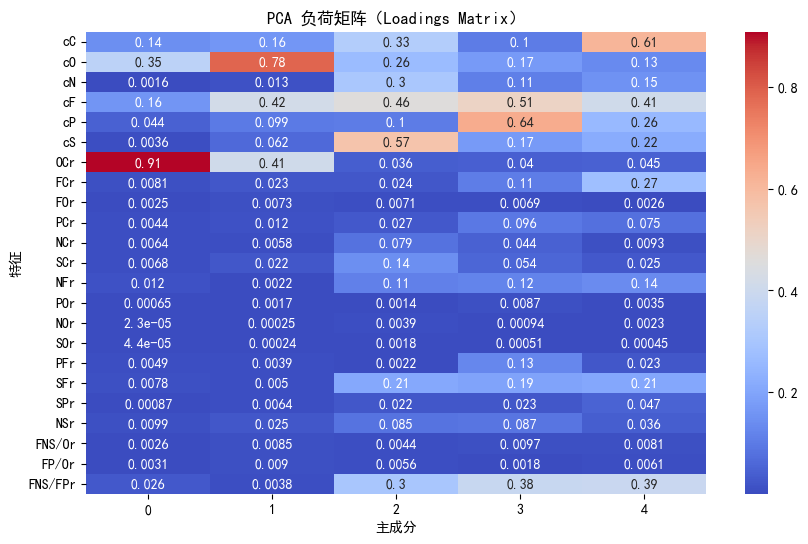

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(abs(feature_importance), annot=True, cmap="coolwarm")
plt.xlabel("‰∏ªÊàêÂàÜ")
plt.ylabel("ÁâπÂæÅ")
plt.title("PCA Ë¥üËç∑Áü©ÈòµÔºàLoadings MatrixÔºâ")
plt.show()


In [21]:
import pandas as pd

# ÈÄâÊã©ÈúÄË¶ÅÂàÜÊûêÁöÑÂàó
selected_features = ['cN', 'NOr', 'cC', 'cO', 'OCr', 'FOr', 'cF', 'lambda']
data = pd.read_excel('../Dataset_Process/Dataset/lambda_data.xlsx', sheet_name='all', header=0)
data = data.fillna(0)  # ‰ΩøÁî®ÂùáÂÄºÂ°´ÂÖÖÁº∫Â§±ÂÄº# ËÆ°ÁÆóÁõ∏ÂÖ≥ÊÄß

# display(data)
correlation_matrix = data[selected_features].corr()

# ËæìÂá∫Áõ∏ÂÖ≥ÊÄß
print(correlation_matrix['lambda'].sort_values(ascending=False))  # ÊåâÁÖßÁõ∏ÂÖ≥ÊÄßÊéíÂ∫è

kendall_corr = df[selected_features].corr(method='kendall')
print(kendall_corr['lambda'].sort_values(ascending=False))


lambda    1.000000
cO        0.332427
OCr       0.300509
cC       -0.177267
FOr      -0.197368
cF       -0.204188
NOr      -0.458861
cN       -0.476377
Name: lambda, dtype: float64
lambda    1.000000
cO        0.202515
OCr       0.057722
cC       -0.027784
cF       -0.093557
FOr      -0.115105
cN       -0.508176
NOr      -0.511548
Name: lambda, dtype: float64


In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import xgboost as xgb

# ÈÄâÊã©ÂõûÂΩíÁâπÂæÅÂíåÁõÆÊ†áÂèòÈáè
selected_features = ['cN', 'NOr', 'cC', 'cO', 'OCr', 'FOr', 'cF']  # ÁâπÂæÅ
target_variable = 'lambda'  # ÁõÆÊ†áÂèòÈáè

# ËØªÂèñÊï∞ÊçÆ
data = pd.read_excel('../Dataset_Process/Dataset/lambda_data.xlsx', sheet_name='all', header=0)

# Â§ÑÁêÜÁº∫Â§±ÂÄºÔºàÊé®Ëçê‰ΩøÁî®ÂùáÂÄºÂ°´ÂÖÖÔºâ
data = data.fillna(data.mean())

# ÂÆö‰πâ XÔºàÁâπÂæÅÔºâÂíå yÔºàÁõÆÊ†áÂèòÈáèÔºâ
X = data[selected_features]
y = data[target_variable]

# ÂàíÂàÜËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜÔºà80% ËÆ≠ÁªÉ, 20% ÊµãËØïÔºâ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **1Ô∏è‚É£ ËÆ≠ÁªÉÁ∫øÊÄßÂõûÂΩí**
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# **2Ô∏è‚É£ ËÆ≠ÁªÉ XGBoost ÂõûÂΩí**
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# **ËÆ°ÁÆó R¬≤ÔºàÂÜ≥ÂÆöÁ≥ªÊï∞Ôºâ**
r2_linear = r2_score(y_test, y_pred_linear)
r2_xgb = r2_score(y_test, y_pred_xgb)

# **ËÆ°ÁÆóËØØÂ∑Æ**
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

# **ÊâìÂç∞ÁªìÊûú**
print(f"üìå Á∫øÊÄßÂõûÂΩí R¬≤: {r2_linear:.4f}, MAE: {mae_linear:.4f}, MSE: {mse_linear:.4f}")
print(f"üìå XGBoost ÂõûÂΩí R¬≤: {r2_xgb:.4f}, MAE: {mae_xgb:.4f}, MSE: {mse_xgb:.4f}")


üìå Á∫øÊÄßÂõûÂΩí R¬≤: 0.2396, MAE: 10.2085, MSE: 147.1081
üìå XGBoost ÂõûÂΩí R¬≤: 0.1270, MAE: 11.2863, MSE: 168.8733


In [ ]:
# ÂéªÊéâF„ÄÅN„ÄÅP‰∏â‰∏™‰∏éFNS/FPr
# F„ÄÅNÂíåOÁªÑÂêàÊó∂ÂùáÊûÅÂ∫¶Áõ∏ÂÖ≥

In [28]:
!pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   -------- ------------------------------- 2.1/9.8 MB 8.4 MB/s eta 0:00:01
   ------------------ --------------------- 4.5/9.8 MB 10.3 MB/s eta 0:00:01
   ---------------------------- ----------- 7.1/9.8 MB 10.9 MB/s eta 0:00:01
   ---------------------------------------  9.7/9.8 MB 11.0 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 11.0 MB/s eta 0:00:00


In [30]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# ÈÄêÊ≠•ÂõûÂΩíÊñπÊ≥ï
def stepwise_regression(X, y, threshold_in=0.01, threshold_out=0.05):
    """ÈÄêÊ≠•ÂõûÂΩíÊñπÊ≥ïÔºå‰ΩøÁî®p-valueËøõË°åÁâπÂæÅÈÄâÊã©"""
    
    # ÂàùÂßãÊ®°ÂûãÂåÖÂê´Â∏∏Êï∞È°π
    initial_features = X.columns.tolist()
    selected_features = []
    
    while True:
        # ÊãüÂêàÂΩìÂâçÊ®°Âûã
        X_selected = X[selected_features] if selected_features else sm.add_constant(X[selected_features])
        model = sm.OLS(y, X_selected).fit()
        
        # Ëé∑Âèñp-valueÂíåR-squared
        p_values = model.pvalues.iloc[1:]  # ‰∏çÂåÖÊã¨Â∏∏Êï∞È°π
        max_p_value = p_values.max()
        
        # Â¶ÇÊûúÊúÄÂ§ßp-valueÂ§ß‰∫éÈòàÂÄºÔºåÂàôÁßªÈô§ÂØπÂ∫îÁöÑÁâπÂæÅ
        if max_p_value >= threshold_out:
            feature_to_remove = p_values.idxmax()
            selected_features.remove(feature_to_remove)
        else:
            break
    
    return selected_features

data = pd.read_excel('../Dataset_Process/Dataset/lambda_data.xlsx', sheet_name='all', header=0)
data = data.fillna(0)  # ‰ΩøÁî®ÂùáÂÄºÂ°´ÂÖÖÁº∫Â§±ÂÄº
# data = data.drop(columns = ['cF','cN','cP','FNS/FPr','FNS/Or','FP/Or'])
X = data[data.columns[:-2]]  # ÁâπÂæÅÁü©Èòµ
y = data['lambda']  # ÁõÆÊ†áÂèòÈáè

# ÊãÜÂàÜÊï∞ÊçÆÈõÜ‰∏∫ËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ËøõË°åÈÄêÊ≠•ÂõûÂΩíÁâπÂæÅÈÄâÊã©
selected_features = stepwise_regression(X_train, y_train)

# ‰ΩøÁî®ÈÄâÊã©ÁöÑÁâπÂæÅËÆ≠ÁªÉÊ®°Âûã
X_train_selected = X_train[selected_features]
X_train_selected = sm.add_constant(X_train_selected)  # Ê∑ªÂä†Â∏∏Êï∞È°π
model = sm.OLS(y_train, X_train_selected).fit()

# ÊâìÂç∞Ê®°ÂûãÁöÑÂõûÂΩíÁªìÊûú
print(model.summary())

# ÂØπÊµãËØïÈõÜËøõË°åÈ¢ÑÊµã
X_test_selected = X_test[selected_features]
X_test_selected = sm.add_constant(X_test_selected)
y_pred = model.predict(X_test_selected)

# ËØÑ‰º∞Ê®°ÂûãÁöÑÊÄßËÉΩ
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")


                            OLS Regression Results                            
Dep. Variable:                 lambda   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 15 Feb 2025   Prob (F-statistic):                nan
Time:                        13:08:44   Log-Likelihood:                -217.86
No. Observations:                  54   AIC:                             437.7
Df Residuals:                      53   BIC:                             439.7
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.6410      1.878      5.665      0.0

In [31]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# ÈÄêÊ≠•ÂõûÂΩíÊñπÊ≥ï
def stepwise_regression(X, y, threshold_in=0.01, threshold_out=0.05):
    """ÈÄêÊ≠•ÂõûÂΩíÊñπÊ≥ïÔºå‰ΩøÁî®p-valueËøõË°åÁâπÂæÅÈÄâÊã©"""
    
    # ÂàùÂßãÊ®°ÂûãÂåÖÂê´Â∏∏Êï∞È°π
    initial_features = X.columns.tolist()
    selected_features = []
    
    while True:
        # ÊãüÂêàÂΩìÂâçÊ®°Âûã
        X_selected = X[selected_features] if selected_features else sm.add_constant(X[selected_features])
        model = sm.OLS(y, X_selected).fit()
        
        # Ëé∑Âèñp-valueÂíåR-squared
        p_values = model.pvalues.iloc[1:]  # ‰∏çÂåÖÊã¨Â∏∏Êï∞È°π
        max_p_value = p_values.max()
        
        # Â¶ÇÊûúÊúÄÂ§ßp-valueÂ§ß‰∫éÈòàÂÄºÔºåÂàôÁßªÈô§ÂØπÂ∫îÁöÑÁâπÂæÅ
        if max_p_value >= threshold_out:
            feature_to_remove = p_values.idxmax()
            selected_features.remove(feature_to_remove)
        else:
            break
    
    return selected_features

# Âä†ËΩΩÊï∞ÊçÆÈõÜ
data = pd.read_excel('../Dataset_Process/Dataset/lambda_data.xlsx', sheet_name='all', header=0)
data = data.fillna(0)  # Â°´ÂÖÖÁº∫Â§±ÂÄºÔºåÂèØ‰ª•Ê†πÊçÆÈúÄË¶ÅË∞ÉÊï¥ÊñπÊ≥ï

# ÁâπÂæÅÂíåÁõÆÊ†áÂèòÈáè
X = data[data.columns[:-2]]  # ÁâπÂæÅÁü©Èòµ
y = data['lambda']  # ÁõÆÊ†áÂèòÈáè

# Êï∞ÊçÆÊ†áÂáÜÂåñ
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # ÂØπÁâπÂæÅËøõË°åÊ†áÂáÜÂåñ

# Â∞ÜÊ†áÂáÜÂåñÂêéÁöÑÊï∞ÊçÆËΩ¨Êç¢‰∏∫DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# ÊãÜÂàÜÊï∞ÊçÆÈõÜ‰∏∫ËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜ
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ËøõË°åÈÄêÊ≠•ÂõûÂΩíÁâπÂæÅÈÄâÊã©
selected_features = stepwise_regression(X_train, y_train)

# ‰ΩøÁî®ÈÄâÊã©ÁöÑÁâπÂæÅËÆ≠ÁªÉÊ®°Âûã
X_train_selected = X_train[selected_features]
X_train_selected = sm.add_constant(X_train_selected)  # Ê∑ªÂä†Â∏∏Êï∞È°π
model = sm.OLS(y_train, X_train_selected).fit()

# ÊâìÂç∞Ê®°ÂûãÁöÑÂõûÂΩíÁªìÊûú
print(model.summary())

# ÂØπÊµãËØïÈõÜËøõË°åÈ¢ÑÊµã
X_test_selected = X_test[selected_features]
X_test_selected = sm.add_constant(X_test_selected)
y_pred = model.predict(X_test_selected)

# ËØÑ‰º∞Ê®°ÂûãÁöÑÊÄßËÉΩ
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")


                            OLS Regression Results                            
Dep. Variable:                 lambda   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 15 Feb 2025   Prob (F-statistic):                nan
Time:                        13:09:48   Log-Likelihood:                -217.86
No. Observations:                  54   AIC:                             437.7
Df Residuals:                      53   BIC:                             439.7
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.6410      1.878      5.665      0.0

In [32]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# Âä†ËΩΩÊï∞ÊçÆÈõÜ
data = pd.read_excel('../Dataset_Process/Dataset/lambda_data.xlsx', sheet_name='all', header=0)
data = data.fillna(0)  # Â°´ÂÖÖÁº∫Â§±ÂÄº

# ÁâπÂæÅÂíåÁõÆÊ†áÂèòÈáè
X = data[data.columns[:-2]]  # ÁâπÂæÅÁü©Èòµ
y = data['lambda']  # ÁõÆÊ†áÂèòÈáè

# Êï∞ÊçÆÊ†áÂáÜÂåñ
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # ÂØπÁâπÂæÅËøõË°åÊ†áÂáÜÂåñ

# Â∞ÜÊ†áÂáÜÂåñÂêéÁöÑÊï∞ÊçÆËΩ¨Êç¢‰∏∫DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# ÊãÜÂàÜÊï∞ÊçÆÈõÜ‰∏∫ËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜ
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ÂàùÂßãÂåñXGBoostÂõûÂΩíÊ®°Âûã
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=3)

# ËÆ≠ÁªÉÊ®°Âûã
model.fit(X_train, y_train)

# ÂØπÊµãËØïÈõÜËøõË°åÈ¢ÑÊµã
y_pred = model.predict(X_test)

# ËÆ°ÁÆóR¬≤ (ÂÜ≥ÂÆöÁ≥ªÊï∞)
r2 = r2_score(y_test, y_pred)

# ÊâìÂç∞R¬≤ÂÄº
print(f"R¬≤ (ÂÜ≥ÂÆöÁ≥ªÊï∞): {r2:.4f}")


R¬≤ (ÂÜ≥ÂÆöÁ≥ªÊï∞): -0.5476
